## Data

Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like leaflets three, 'let it be' for Poisonous Oak and Ivy.

Attributes : 

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


## Exploritory Data Analysis

In [5]:
def visualize_attribute(column,arr):
    plt.figure(figsize=(10, 8))
    splot = sns.countplot(data=df, x=column,
                          hue='class',
                          order=df[column].value_counts().index,
                          palette='coolwarm',
                          edgecolor=(0, 0, 0),
                          linewidth=2)

    splot.set_xticklabels(arr)

    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points')

    plt.legend(['Poisonous', 'Edible'], loc='upper right')
    plt.ylabel('Number of the Mushrooms', fontsize=14)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Cap Shapes')

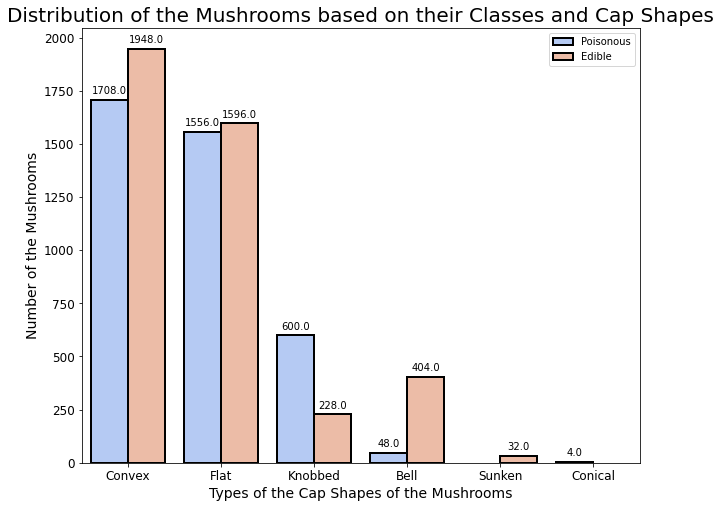

In [6]:
visualize_attribute('cap-shape',['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])
plt.xlabel('Types of the Cap Shapes of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Cap Shapes', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Cap Surfaces')

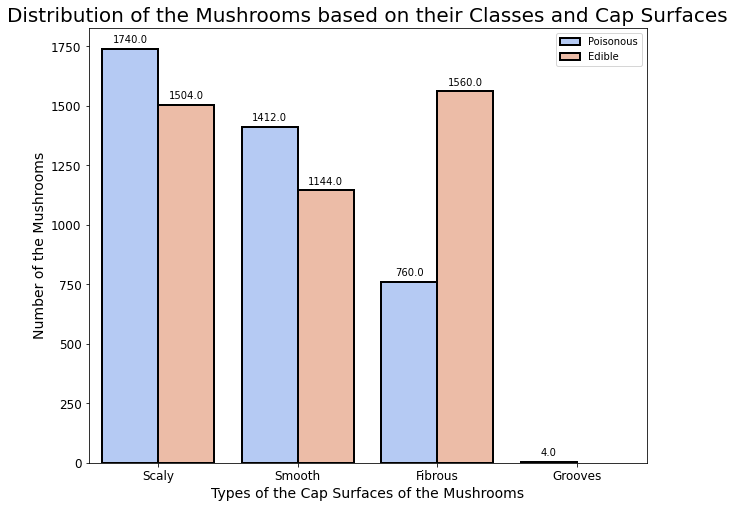

In [7]:
visualize_attribute('cap-surface',['Scaly','Smooth','Fibrous','Grooves'])
plt.xlabel('Types of the Cap Surfaces of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Cap Surfaces', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Cap Colors')

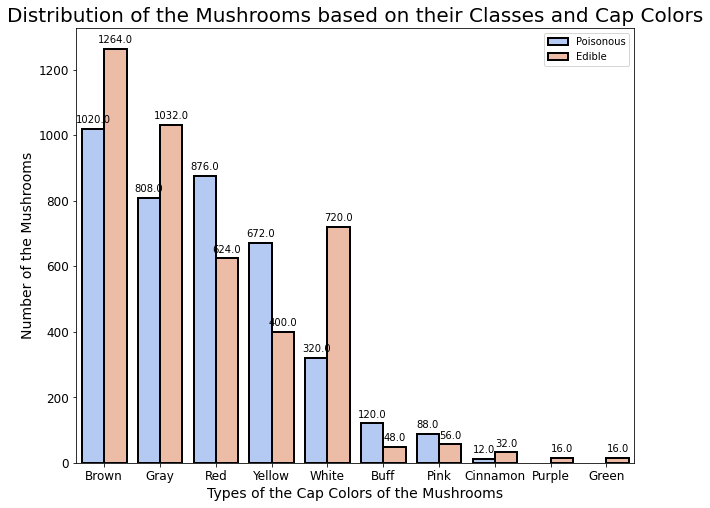

In [8]:
visualize_attribute('cap-color',['Brown','Gray','Red','Yellow','White','Buff','Pink','Cinnamon','Purple','Green'])
plt.xlabel('Types of the Cap Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Cap Colors', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Bruises')

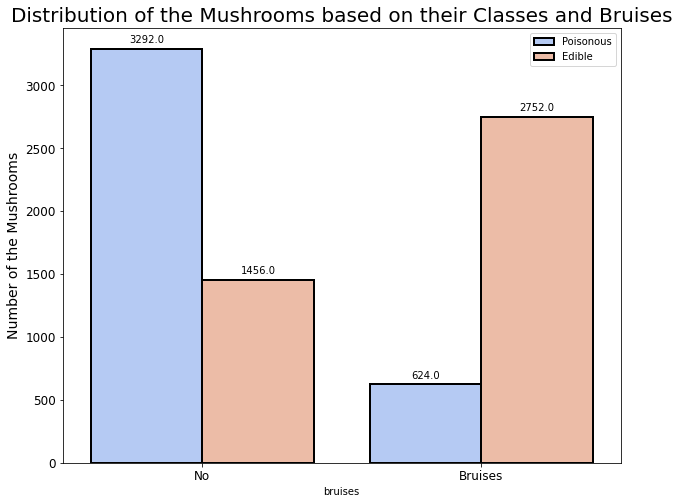

In [9]:
visualize_attribute('bruises',['No','Bruises'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Bruises', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Odors')

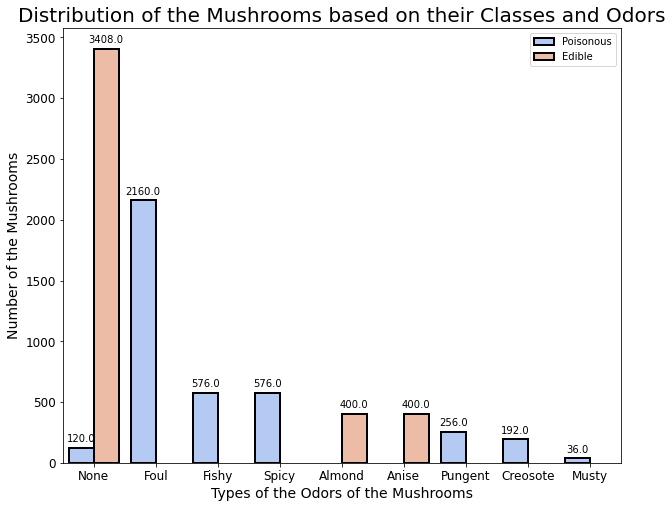

In [10]:
visualize_attribute('odor',['None','Foul','Fishy','Spicy','Almond','Anise','Pungent','Creosote','Musty'])
plt.xlabel('Types of the Odors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Odors', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Gill Attachment')

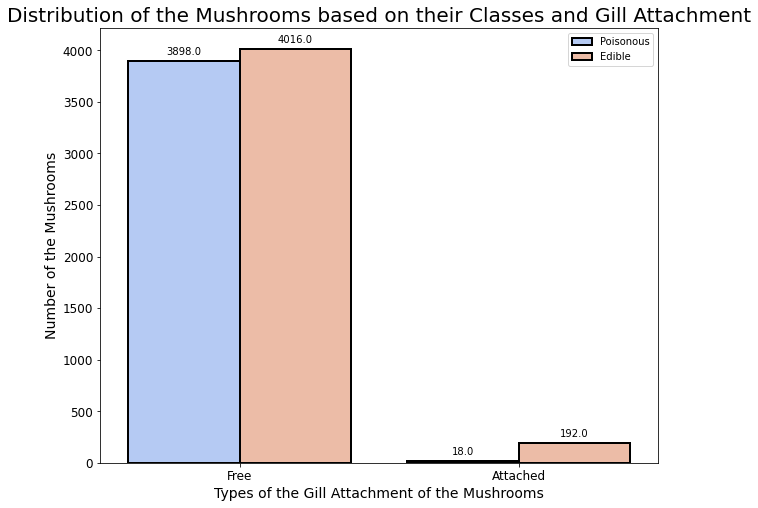

In [11]:
visualize_attribute('gill-attachment',['Free','Attached'])
plt.xlabel('Types of the Gill Attachment of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Gill Attachment', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Gill Spacing')

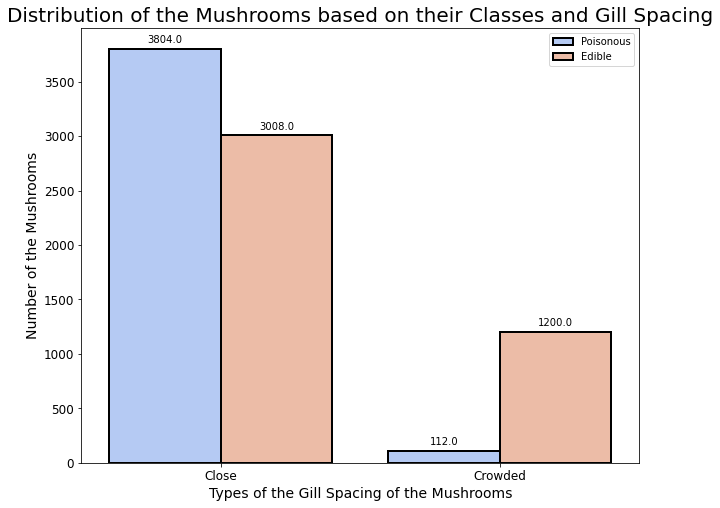

In [12]:
visualize_attribute('gill-spacing',['Close','Crowded'])
plt.xlabel('Types of the Gill Spacing of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Gill Spacing', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Gill Sizes')

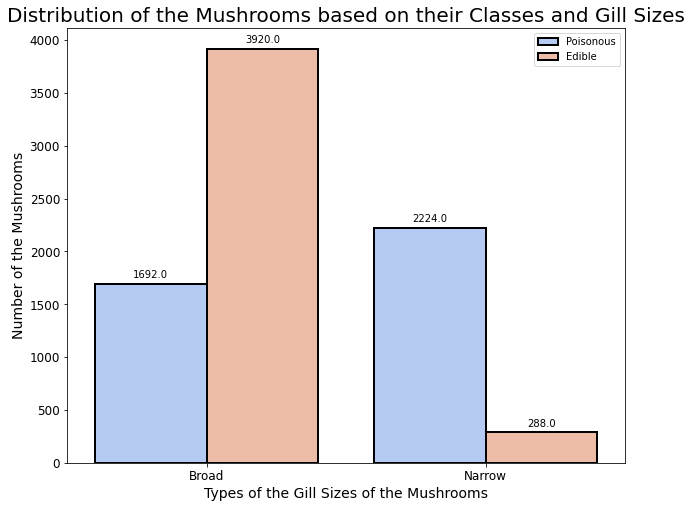

In [13]:
visualize_attribute('gill-size',['Broad','Narrow'])
plt.xlabel('Types of the Gill Sizes of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Gill Sizes', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Gill Colors')

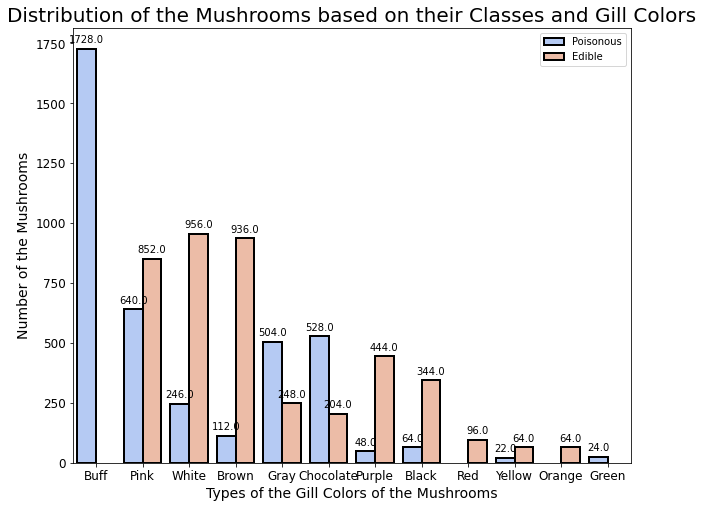

In [14]:
visualize_attribute('gill-color',['Buff','Pink','White','Brown','Gray','Chocolate','Purple','Black','Red','Yellow','Orange','Green'])
plt.xlabel('Types of the Gill Colors of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Gill Colors', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Stalk Shapes')

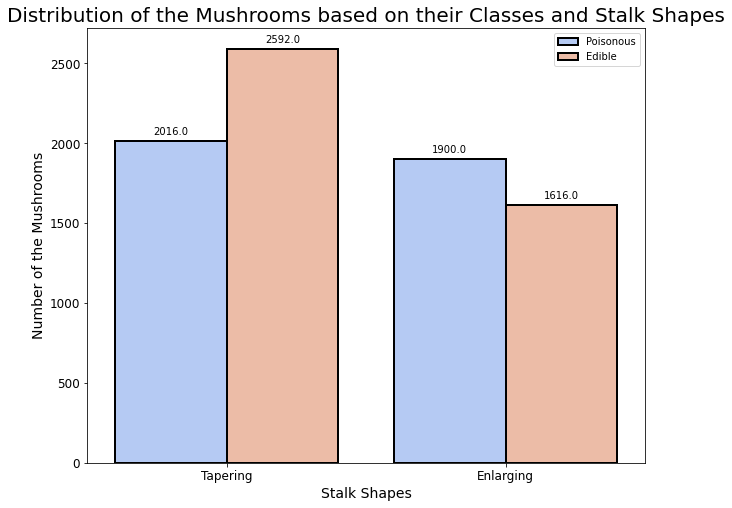

In [15]:
visualize_attribute('stalk-shape',['Tapering','Enlarging'])
plt.xlabel('Stalk Shapes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Stalk Shapes', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Stalk Roots')

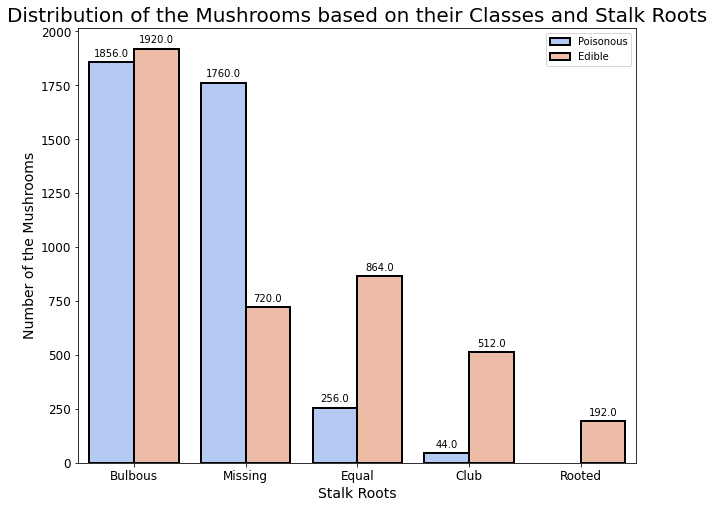

In [16]:
visualize_attribute('stalk-root',['Bulbous','Missing','Equal','Club','Rooted'])
plt.xlabel('Stalk Roots', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Stalk Roots', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Stalk Surface Above Ring')

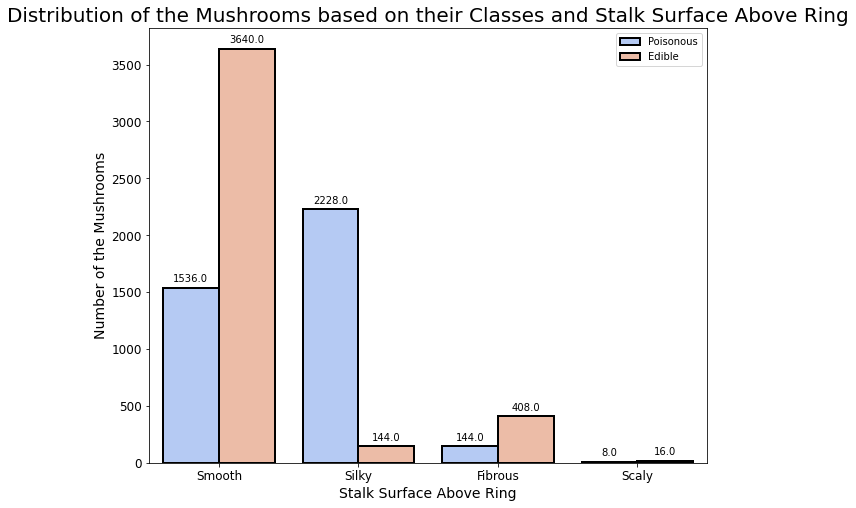

In [17]:
visualize_attribute('stalk-surface-above-ring',['Smooth','Silky','Fibrous','Scaly'])
plt.xlabel('Stalk Surface Above Ring', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Stalk Surface Above Ring', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Stalk Color Above Ring')

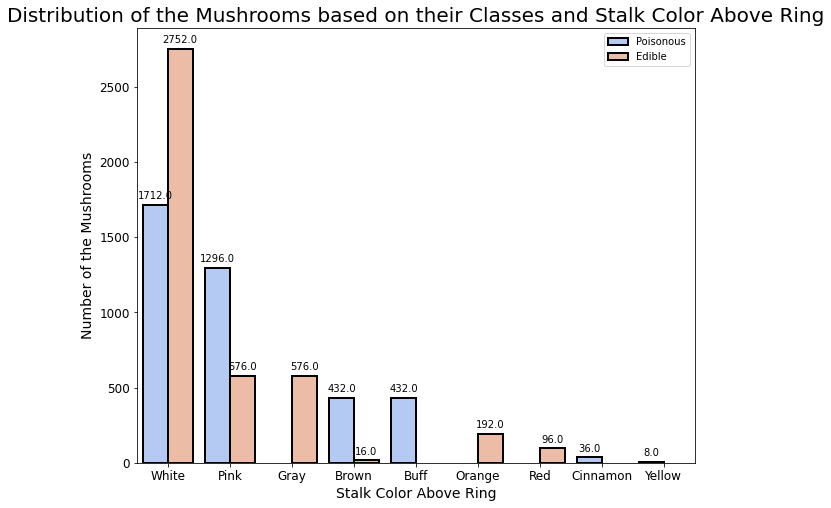

In [18]:
visualize_attribute('stalk-color-above-ring',['White','Pink','Gray','Brown','Buff','Orange','Red','Cinnamon','Yellow'])
plt.xlabel('Stalk Color Above Ring', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Stalk Color Above Ring', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Veil Colors')

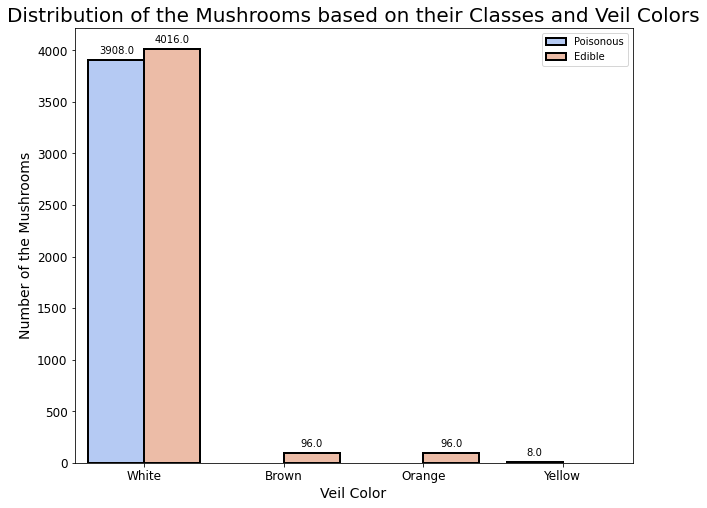

In [19]:
visualize_attribute('veil-color',['White','Brown','Orange','Yellow'])
plt.xlabel('Veil Color', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Veil Colors', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Ring Numbers')

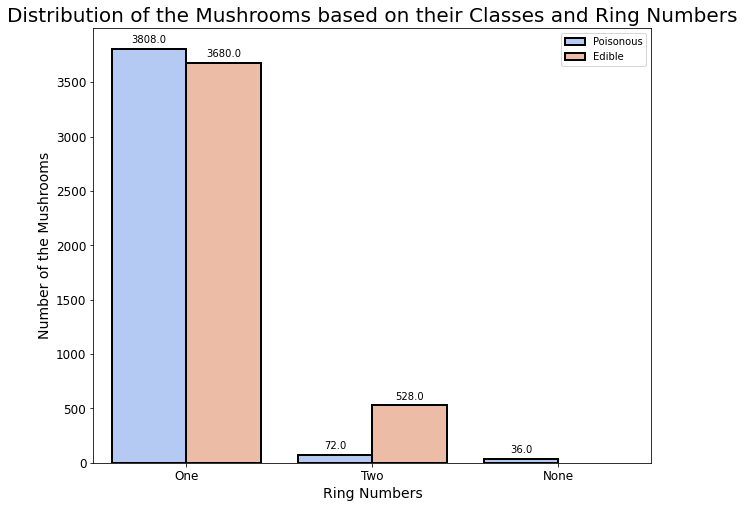

In [20]:
visualize_attribute('ring-number',['One','Two','None'])
plt.xlabel('Ring Numbers', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Ring Numbers', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Ring Types')

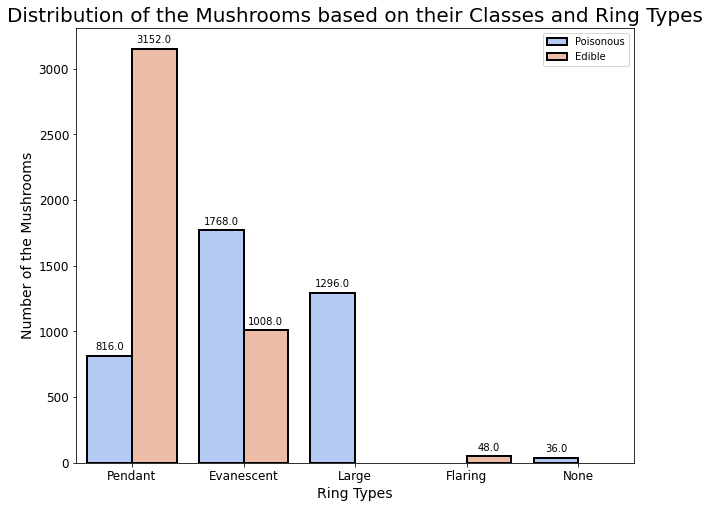

In [21]:
visualize_attribute('ring-type',['Pendant','Evanescent','Large','Flaring','None'])
plt.xlabel('Ring Types', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Ring Types', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Spore Print Colors')

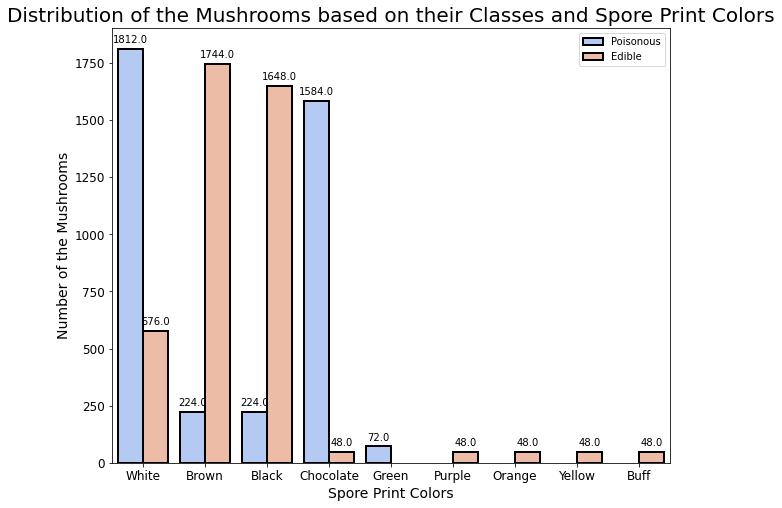

In [22]:
visualize_attribute('spore-print-color',['White','Brown','Black','Chocolate','Green','Purple','Orange','Yellow','Buff'])
plt.xlabel('Spore Print Colors', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Spore Print Colors', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Populations')

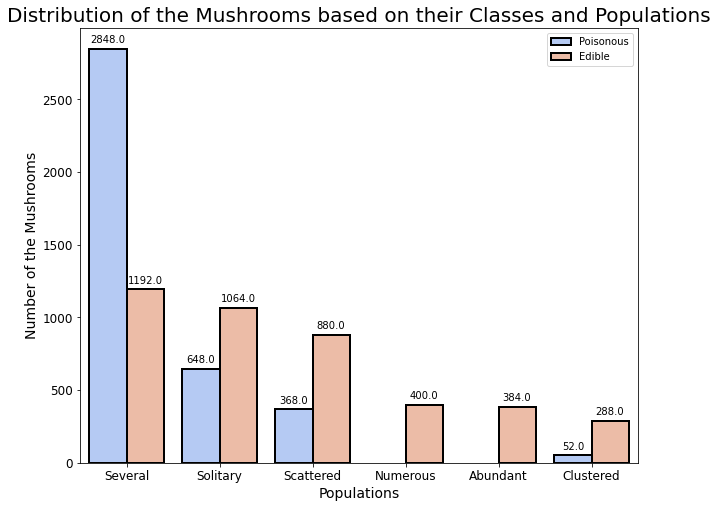

In [23]:
visualize_attribute('population',['Several','Solitary','Scattered','Numerous','Abundant','Clustered'])
plt.xlabel('Populations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Populations', fontsize=20)

Text(0.5, 1.0, 'Distribution of the Mushrooms based on their Classes and Habitats')

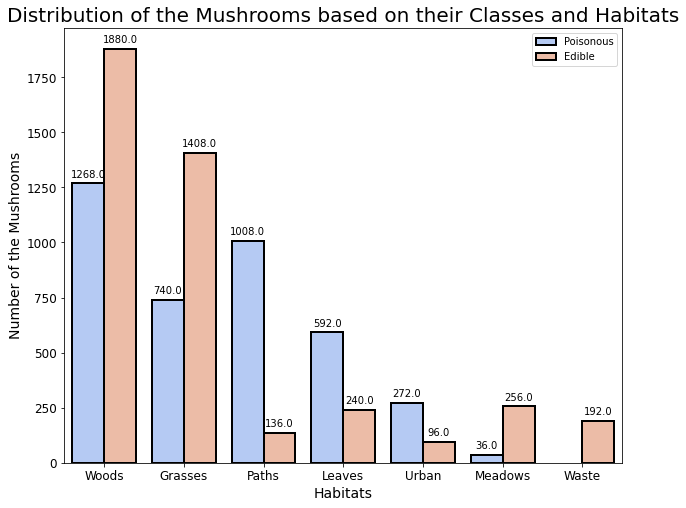

In [24]:
visualize_attribute('habitat',['Woods','Grasses','Paths','Leaves','Urban','Meadows','Waste'])
plt.xlabel('Habitats', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms based on their Classes and Habitats', fontsize=20)

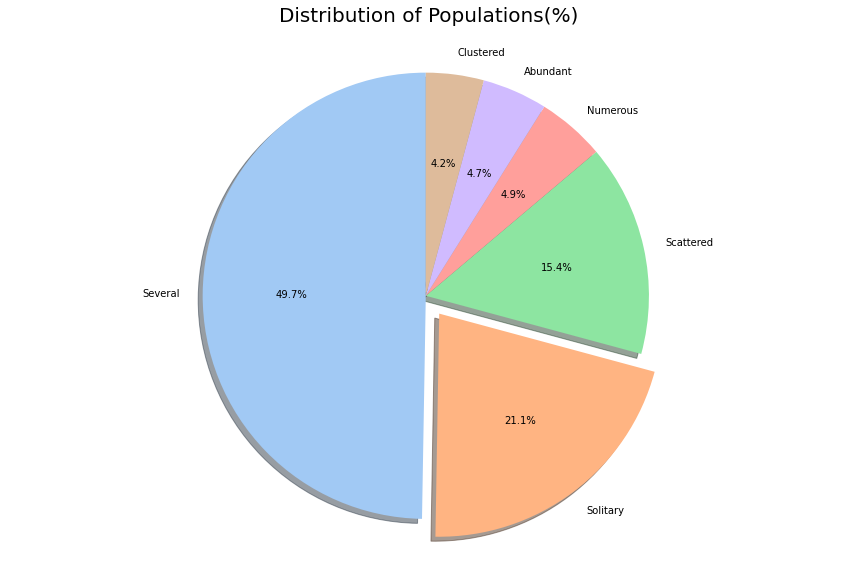

In [25]:
population_values = df['population'].value_counts(normalize=True) * 100

labels = ['Several','Solitary','Scattered','Numerous','Abundant','Clustered']
colors = sns.color_palette('pastel')[0:6]

explode = (0, 0.1, 0, 0,0,0)

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(population_values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = colors)
ax1.axis('equal')
plt.title('Distribution of Populations(%)\n', fontsize=20)
plt.tight_layout()
plt.show()

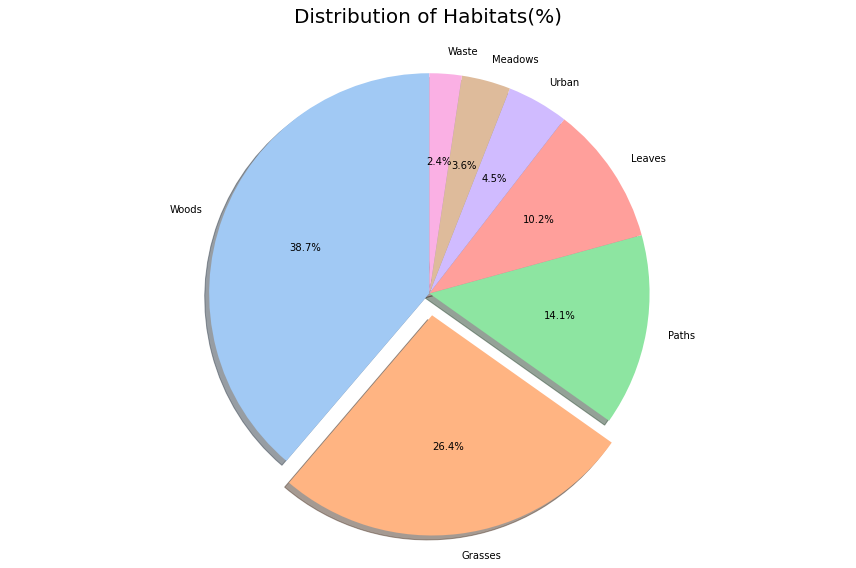

In [26]:
habitat_values = df['habitat'].value_counts(normalize=True) * 100
labels = ['Woods','Grasses','Paths','Leaves','Urban','Meadows','Waste']

colors = sns.color_palette('pastel')[0:7]

explode = (0, 0.1, 0, 0,0,0,0)

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(habitat_values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = colors)
ax1.axis('equal')
plt.title('Distribution of Habitats(%)\n', fontsize=20)
plt.tight_layout()
plt.show()

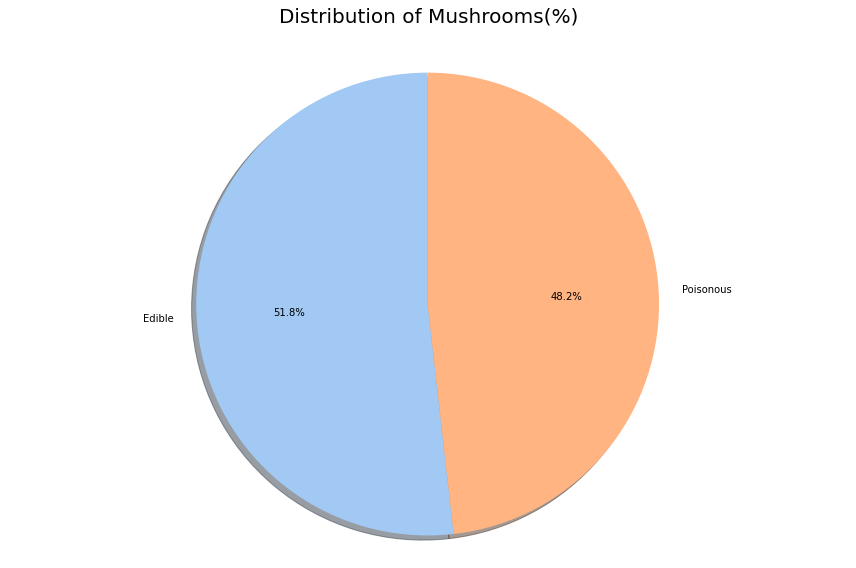

In [27]:
class_values = df['class'].value_counts(normalize=True) * 100
labels = ['Edible','Poisonous']

colors = sns.color_palette('pastel')[0:2]


fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(class_values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = colors)
ax1.axis('equal')
plt.title('Distribution of Mushrooms(%)\n', fontsize=20)
plt.tight_layout()
plt.show()

## Data Preprocessing

In [51]:
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("mushrooms.csv")

le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [54]:
data = data[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat','class']]

In [55]:
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


In [56]:
len(data)

8124

In [57]:
from sklearn.model_selection import train_test_split

X = data.drop("class",axis=1)
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [61]:
X_train["class"] = y_train
train = X_train
X_test["class"] = y_test
test = X_test

## Building Neural Network Model

In [80]:
rg = np.random.default_rng()

weights = rg.random((1, 22))[0]

In [133]:
weights

array([0.55339476, 0.07923336, 0.67708195, 0.98856995, 0.30662235,
       0.40280096, 0.52314513, 0.19720255, 0.19517709, 0.25087064,
       0.74398173, 0.71698644, 0.97730019, 0.42625699, 0.86047096,
       0.83788953, 0.91097897, 0.56658424, 0.27734313, 0.9395278 ,
       0.66100024, 0.49976319])

In [134]:
def get_weighted_sum(feature, weights, bias):
    return np.dot(feature, weights) + bias

def sigmoid(w_sum):
    return 1/(1+np.exp(-w_sum))

def cross_entropy(target, prediction):
    return -(target*np.log10(prediction) + (1-target)*np.log10(1-prediction))

def update_weights(weights, l_rate, target, prediction, feature):
    new_weights = []
    for x,w in zip(feature, weights):
        new_w = w + l_rate*(target-prediction)*x
        new_weights.append(new_w)
    return new_weights

def update_bias(bias, l_rate, target, prediction):
    return bias + l_rate*(target-prediction)

In [143]:
bias = 0.5
l_rate = 0.01
epochs = 500
epoch_loss = []

def train_model(data, weights, bias, l_rate, epochs):
    for e in range(epochs):
        individual_loss = []    
        for i in range(len(data)):
            idx = data.index[i]
            feature = data.loc[idx][:-1]
            target = data.loc[idx][-1]
            w_sum = get_weighted_sum(feature, weights, bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy(target, prediction)
            individual_loss.append(loss)
            # gradient descent
            weights =  update_weights(weights, l_rate, target, prediction, feature)
            bias = update_bias(bias, l_rate, target, prediction)
        average_loss = sum(individual_loss)/len(individual_loss)
        epoch_loss.append(average_loss)
    return weights,bias
        
new_weights, new_bias = train_model(train, weights, bias, l_rate, epochs)

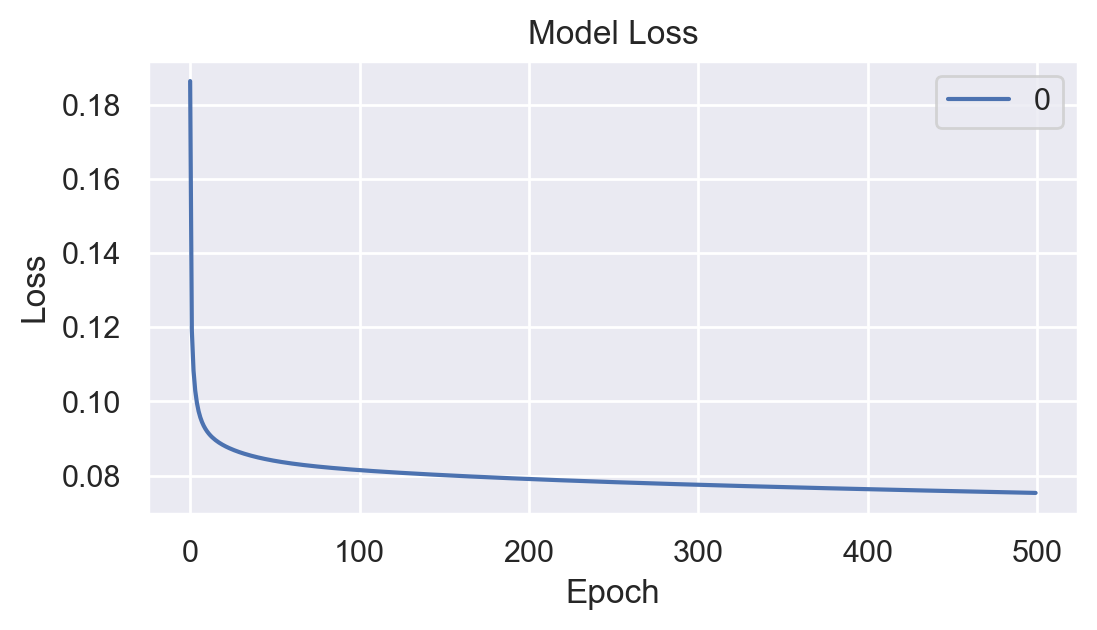

In [144]:
import seaborn as sns

epoch_loss_df = pd.DataFrame(epoch_loss)

plt.figure(figsize=(6,3),dpi=200)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
sns.set_theme(style="darkgrid")
sns.lineplot(data=epoch_loss_df);

In [145]:
new_weights

[-0.02340516874088501,
 0.4245182437781073,
 -0.09530879951055396,
 0.4358820017033421,
 -0.884929676850996,
 -8.02175036227819,
 -15.716441909255286,
 15.735311575033238,
 -0.3368746383042571,
 -0.6827983903851754,
 -5.36790223906929,
 -9.322894492066176,
 0.19322964140475793,
 -0.29729088212086596,
 -0.14166562013795095,
 0.8378895321891487,
 18.649269716377926,
 1.8460521095863538,
 3.033979782054568,
 -0.44005485394708616,
 -1.037014537882071,
 0.37477743264395785]

In [146]:
new_bias

-9.14909622095345

In [147]:
nn_preds = []    
for i in range(len(test)):
    idx = test.index[i]
    feature = test.loc[idx][:-1]
    target = test.loc[idx][-1]
    w_sum = get_weighted_sum(feature, new_weights, new_bias)
    prediction = sigmoid(w_sum)
    if prediction >= 0.5:
        nn_preds.append(1)
    else:
        nn_preds.append(0)

In [148]:
true_classes = test["class"]

In [149]:
from sklearn.metrics import classification_report,confusion_matrix

report = classification_report(true_classes, nn_preds)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       851
           1       0.96      0.93      0.95       774

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



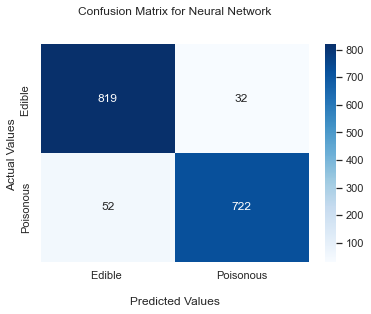

In [150]:
confusion = confusion_matrix(true_classes,nn_preds)

ax = sns.heatmap(confusion, annot=True, cmap='Blues',fmt='g')


ax.set_title('Confusion Matrix for Neural Network\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Edible ','Poisonous'])
ax.yaxis.set_ticklabels(['Edible ','Poisonous'])

plt.show()